# EDA And Modeling of customer churn

## imprting packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

## EDA

In [2]:
df=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
pd.to_numeric(df.TotalCharges,errors="coerce").isna().sum()

11

In [8]:
df=df[~pd.to_numeric(df.TotalCharges,errors="coerce").isna()]

In [9]:
df.shape

(7032, 21)

In [10]:
df["TotalCharges"]=pd.to_numeric(df.TotalCharges)

In [11]:
categorical_variables=['gender','SeniorCitizen','Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn']

In [12]:
categorical_variables

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

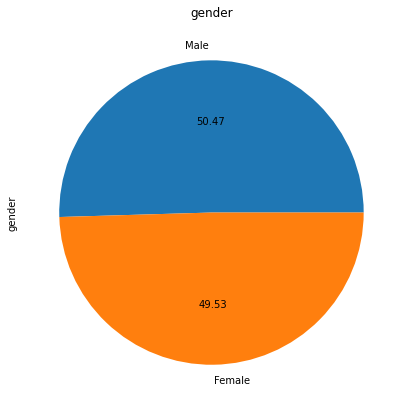

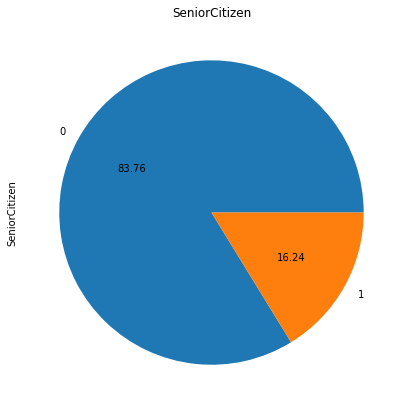

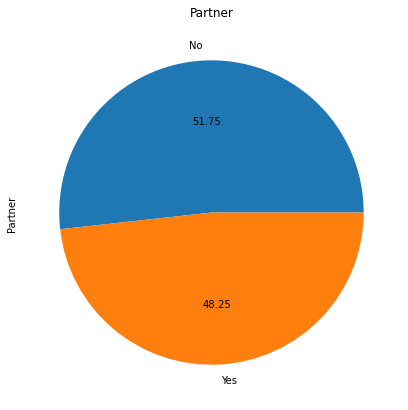

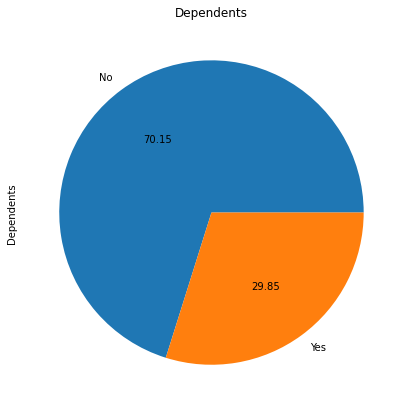

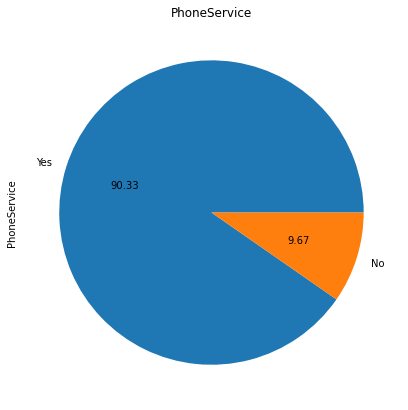

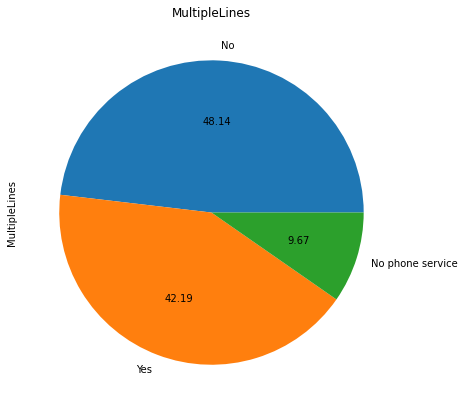

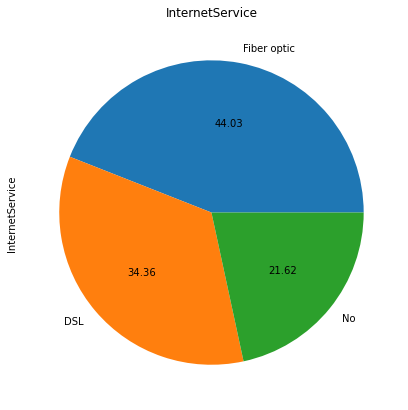

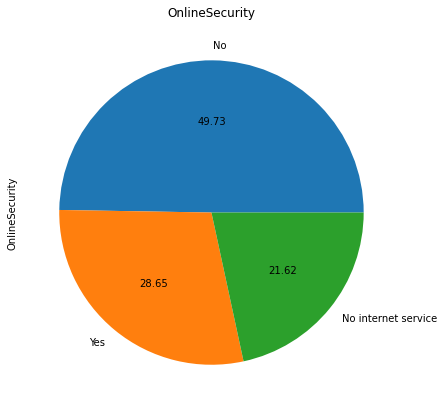

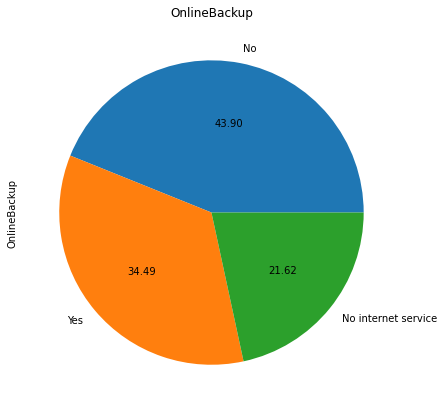

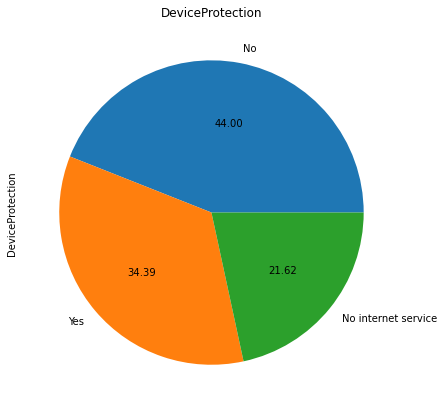

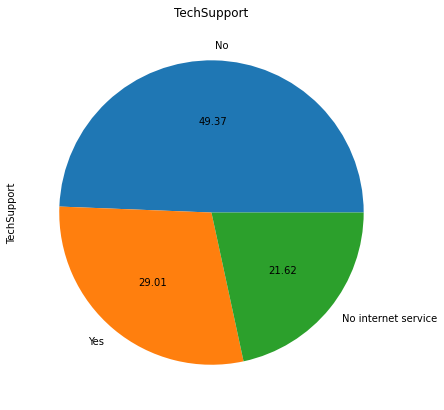

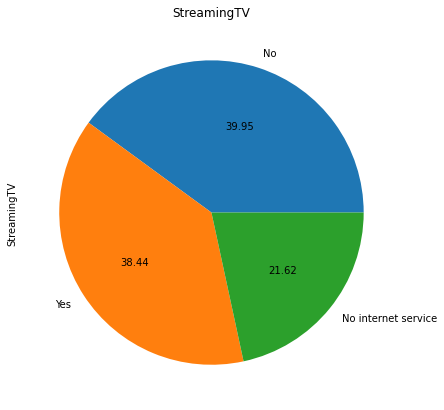

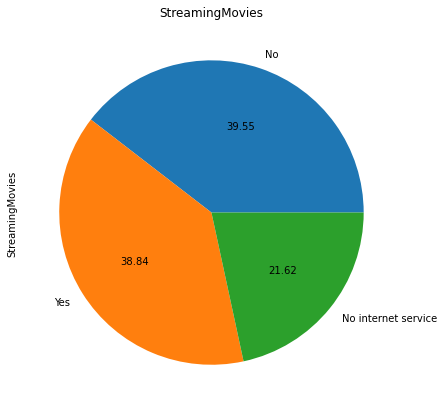

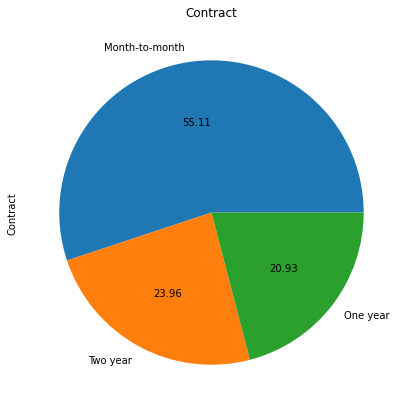

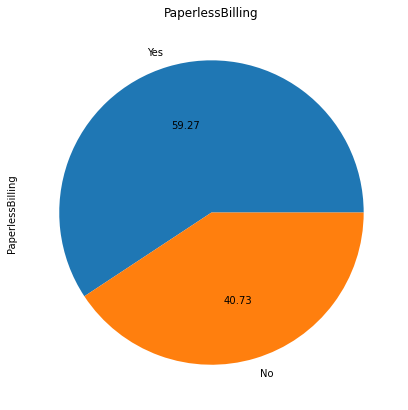

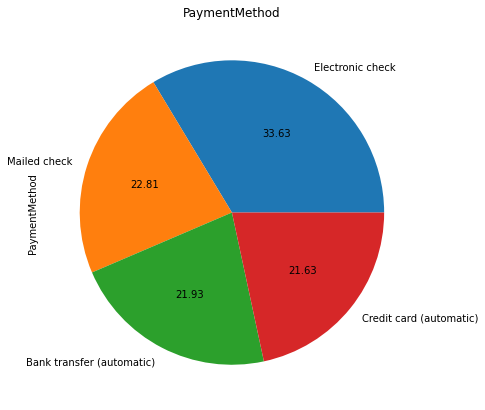

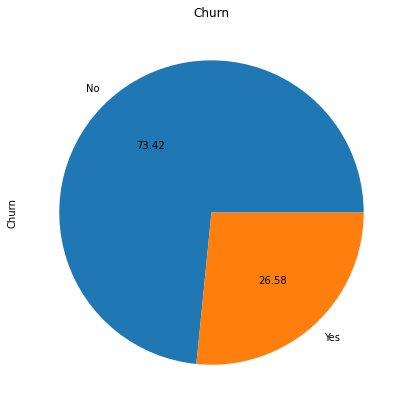

In [20]:
for i in range(len(categorical_variables)):
    plt.figure(figsize=(7,7))
    df[categorical_variables[i]].value_counts().plot(kind="pie",title=categorical_variables[i],autopct='%.2f')

In [21]:
df["tenure"].value_counts().sort_index()

1     613
2     238
3     200
4     176
5     133
     ... 
68    100
69     95
70    119
71    170
72    362
Name: tenure, Length: 72, dtype: int64

<AxesSubplot:>

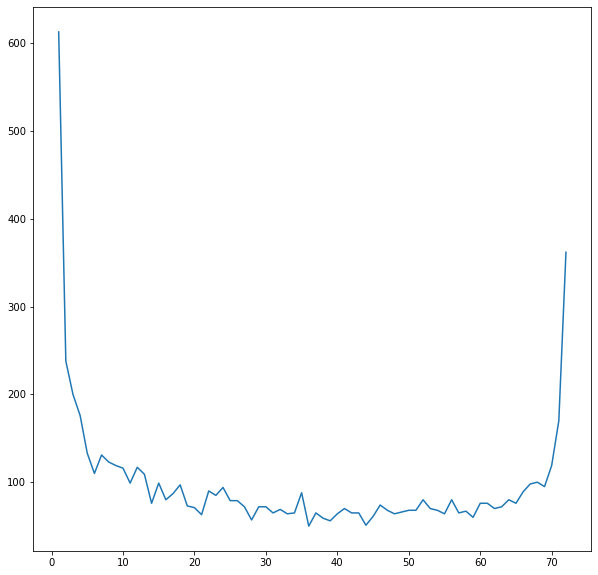

In [22]:
plt.figure(figsize=(10,10))
df["tenure"].value_counts().sort_index().plot(kind="line")

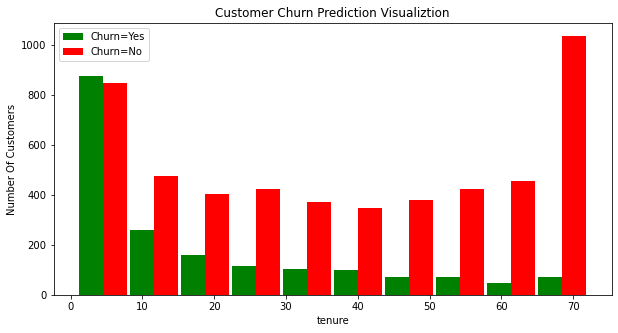

In [23]:
tenure_churn_no = df[df.Churn=='No'].tenure
tenure_churn_yes = df[df.Churn=='Yes'].tenure

plt.figure(figsize=(10,5))
plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

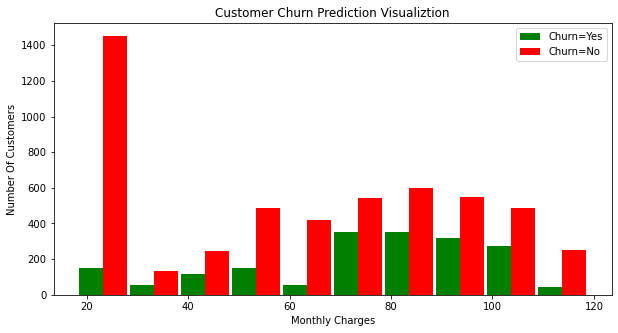

In [24]:
mc_churn_no = df[df.Churn=='No'].MonthlyCharges      
mc_churn_yes = df[df.Churn=='Yes'].MonthlyCharges      

plt.figure(figsize=(10,5))
plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")


plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [25]:
list(df.dtypes[df.dtypes==object].index)

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [29]:
for i in list(df.dtypes[df.dtypes==object].index):
    print( i, df[i].unique())


customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender ['Female' 'Male']
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes']
OnlineBackup ['Yes' 'No']
DeviceProtection ['No' 'Yes']
TechSupport ['No' 'Yes']
StreamingTV ['No' 'Yes']
StreamingMovies ['No' 'Yes']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn ['No' 'Yes']


## Data preprocessing

### Replaceing Values

#### "No Internet serice" = "No"
#### "No Phone service" = "No"

In [30]:
df.replace(to_replace='No internet service',value="No",inplace=True)
df.replace(to_replace='No phone service',value="No",inplace=True)

In [31]:
for i in list(df.dtypes[df.dtypes==object].index):
    print( i, df[i].unique())

customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender ['Female' 'Male']
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes']
OnlineBackup ['Yes' 'No']
DeviceProtection ['No' 'Yes']
TechSupport ['No' 'Yes']
StreamingTV ['No' 'Yes']
StreamingMovies ['No' 'Yes']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn ['No' 'Yes']


In [32]:
df['gender'].replace({'Female':1,'Male':0},inplace=True)

In [33]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df[col].replace({'Yes': 1,'No': 0},inplace=True)

In [34]:
list(df.dtypes[df.dtypes==object].index)

['customerID', 'InternetService', 'Contract', 'PaymentMethod']

In [35]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### One hot encoding to covert Categorical features to Numberica values

In [36]:
df1= pd.get_dummies(data=df, columns=['InternetService','Contract','PaymentMethod'])
df1.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [37]:
df1.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2621,8766-PAFNE,0,0,1,0,71,1,0,0,1,...,1,0,0,0,0,1,0,1,0,0
6238,5188-HGMLP,0,1,1,0,54,1,1,0,0,...,0,1,0,1,0,0,1,0,0,0
1806,8966-KZXXA,0,0,1,1,36,1,1,0,0,...,0,0,1,0,0,1,0,1,0,0
2354,9424-CMPOG,0,0,1,1,9,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
4476,7434-SHXLS,1,0,0,0,1,1,0,0,0,...,0,0,1,1,0,0,0,0,0,1
2458,7516-GMHUV,0,1,1,0,50,1,1,1,0,...,0,1,0,0,0,1,0,1,0,0
5054,6094-ZIVKX,1,0,0,0,68,1,0,1,0,...,1,0,0,0,1,0,0,1,0,0
5873,2122-YWVYA,1,0,0,0,18,1,0,1,0,...,0,1,0,1,0,0,0,0,1,0
4349,7903-CMPEY,0,1,1,0,1,1,1,1,0,...,0,1,0,1,0,0,0,0,1,0
3730,6771-XWBDM,1,0,1,0,57,1,1,0,1,...,0,1,0,1,0,0,0,1,0,0


In [38]:
df1=df1.iloc[:,1:]

In [39]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7032 non-null   int64  
 1   SeniorCitizen                            7032 non-null   int64  
 2   Partner                                  7032 non-null   int64  
 3   Dependents                               7032 non-null   int64  
 4   tenure                                   7032 non-null   int64  
 5   PhoneService                             7032 non-null   int64  
 6   MultipleLines                            7032 non-null   int64  
 7   OnlineSecurity                           7032 non-null   int64  
 8   OnlineBackup                             7032 non-null   int64  
 9   DeviceProtection                         7032 non-null   int64  
 10  TechSupport                              7032 no

### Scaling the data

In [65]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

scaler = MinMaxScaler()
df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

In [66]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.495307,0.162400,0.482509,0.298493,32.421786,0.903299,0.421928,0.286547,0.344852,0.343857,0.290102,0.384386,0.388367,0.592719,64.798208,2283.300441,0.265785
std,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.493902,0.452180,0.475354,0.475028,0.453842,0.486484,0.487414,0.491363,30.085974,2266.771362,0.441782
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.587500,401.450000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1397.475000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.862500,3794.737500,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,1.000000


In [40]:
df1.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

## under sampling to deal with the imbalance Data set

In [45]:
df1[df1.Churn=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check


In [46]:
df2_N= df1[df1.Churn==0]
df2_Y= df1[df1.Churn==1]

In [47]:
print(df2_N.shape)
print(df2_Y.shape)

(5163, 27)
(1869, 27)


In [49]:
df2_N.sample(1869)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6128,1,0,1,0,14,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
1241,0,0,0,0,30,1,1,1,0,0,...,1,0,0,1,0,0,0,0,0,1
1419,0,0,1,1,63,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
6795,1,0,1,1,55,1,1,1,1,0,...,0,1,0,1,0,0,0,0,1,0
2349,0,0,1,1,72,1,1,0,1,1,...,0,1,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1525,1,0,1,1,7,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4659,1,0,1,1,65,1,1,1,0,1,...,0,1,0,0,0,1,0,1,0,0
3427,1,0,1,0,21,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
1254,1,1,1,0,55,1,0,0,0,1,...,0,1,0,0,0,1,0,1,0,0


In [51]:
df3=pd.concat([df2_N.sample(1869),df2_Y],axis=0)

## train test split

In [52]:
X = df3.drop('Churn',axis='columns')
y = df3['Churn']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [53]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2990, 26)
(748, 26)
(2990,)
(748,)


In [54]:
X_train[:5]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
954,0,0,0,0,22,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
3546,0,0,1,0,71,1,1,1,0,1,...,1,0,0,0,0,1,0,0,1,0
3248,0,1,1,0,10,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
1981,1,0,1,0,58,1,1,0,0,1,...,0,1,0,1,0,0,0,1,0,0
3120,1,0,1,0,69,1,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0


## building and trainning the ANN Model

In [56]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])



In [57]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
94/94 [==============================] - 0s 930us/step - loss: 1.4738 - accuracy: 0.6622
Epoch 2/100
94/94 [==============================] - 0s 1ms/step - loss: 1.4014 - accuracy: 0.6732
Epoch 3/100
94/94 [==============================] - 0s 1ms/step - loss: 0.9526 - accuracy: 0.6900: 0s - loss: 0.9142 - accuracy: 0.69
Epoch 4/100
94/94 [==============================] - ETA: 0s - loss: 0.8178 - accuracy: 0.72 - 0s 1ms/step - loss: 0.8660 - accuracy: 0.7040
Epoch 5/100
94/94 [==============================] - 0s 1ms/step - loss: 0.7956 - accuracy: 0.7017: 0s - loss: 0.7066 - accuracy: 0.
Epoch 6/100
94/94 [==============================] - 0s 1ms/step - loss: 0.7632 - accuracy: 0.7064
Epoch 7/100
94/94 [==============================] - 0s 1ms/step - loss: 0.7281 - accuracy: 0.7187
Epoch 8/100
94/94 [==============================] - ETA: 0s - loss: 0.8047 - accuracy: 0.71 - 0s 1ms/step - loss: 0.7214 - accuracy: 0.7221
Epoch 9/100
94/94 [==============================] -

94/94 [==============================] - 0s 1ms/step - loss: 0.8490 - accuracy: 0.7227
Epoch 81/100
94/94 [==============================] - 0s 1ms/step - loss: 0.6905 - accuracy: 0.7304
Epoch 82/100
94/94 [==============================] - 0s 958us/step - loss: 0.6362 - accuracy: 0.7441
Epoch 83/100
94/94 [==============================] - 0s 949us/step - loss: 0.9035 - accuracy: 0.7154
Epoch 84/100
94/94 [==============================] - 0s 942us/step - loss: 0.6575 - accuracy: 0.7385
Epoch 85/100
94/94 [==============================] - 0s 955us/step - loss: 0.7129 - accuracy: 0.72210s - loss: 0.6242 - accuracy: 0.73
Epoch 86/100
94/94 [==============================] - 0s 1ms/step - loss: 0.7949 - accuracy: 0.7311
Epoch 87/100
94/94 [==============================] - 0s 1ms/step - loss: 0.6199 - accuracy: 0.7438
Epoch 88/100
94/94 [==============================] - 0s 999us/step - loss: 0.5999 - accuracy: 0.7455
Epoch 89/100
94/94 [==============================] - ETA: 0s - loss:

## Model Evaluation

In [58]:
model.evaluate(X_test, y_test)

24/24 [==============================] - 0s 782us/step - loss: 0.5014 - accuracy: 0.7553


[0.5013806223869324, 0.7553476095199585]

In [59]:
yp = model.predict(X_test)
yp[:5]

array([[0.23255146],
       [0.2268481 ],
       [0.35889682],
       [0.36889553],
       [0.5436063 ]], dtype=float32)

In [60]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [61]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.69      0.74       377
           1       0.72      0.82      0.77       371

    accuracy                           0.76       748
   macro avg       0.76      0.76      0.75       748
weighted avg       0.76      0.76      0.75       748



Text(69.0, 0.5, 'Truth')

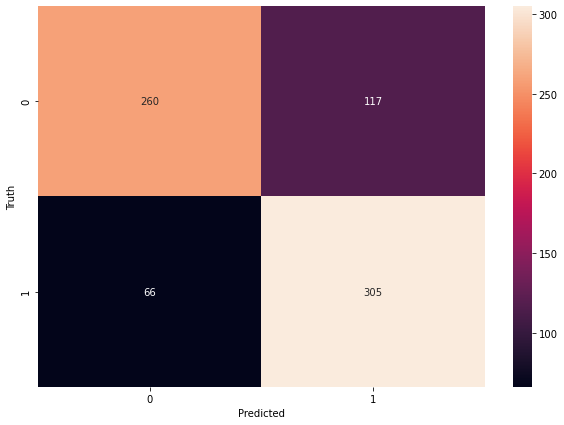

In [62]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')